### **STATSMODELS REGRESSION**
Statsmodels es una biblioteca de Python que proporciona clases y funciones para realizar análisis estadísticos y estimaciones de modelos, incluidos modelos de regresión. En particular, Statsmodels incluye una clase llamada OLS (Ordinary Least Squares) que se utiliza para realizar regresiones lineales.

### **CHALLENGE 1**
**I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:**


Trabajo en una academia de programación y he desarrollado la teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para poner a prueba mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

**Use this command to create a dataframe with the data provided in the table.**

Para crear un DataFrame con los datos proporcionados, puedes utilizar el siguiente código en Python utilizando la biblioteca pandas: 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

**SI USAS JUPITER NOTEBOOK, PARA QUE NO TE ABRA UN GRÁFICO EN UNA VENTANA EMERGENTE USAR:** %matplotlib inline

Al establecer **pd.options.plotting.backend en "plotly"**, le estás diciendo a Pandas que utilice Plotly como motor de gráficos cuando generas visualizaciones directamente desde un DataFrame utilizando métodos como plot().


La línea **sns.set(rc={'figure.figsize':(8,8)})** se utiliza para establecer el tamaño predeterminado de las figuras generadas por Seaborn.

In [86]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.plotting.backend = "plotly"
sns.set(rc={'figure.figsize':(8,8)})

# Modelo
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Procesamiento de datos
from sklearn.preprocessing import MinMaxScaler

**import statsmodels.api as sm**

Esta línea importa el módulo api de statsmodels y lo asigna a la abreviatura sm. Este módulo proporciona una interfaz para la especificación y estimación de modelos estadísticos. Al importar esto, tendrás acceso a diversas clases y funciones para trabajar con modelos estadísticos, incluyendo modelos de regresión lineal, modelos de series temporales, y más.

**from statsmodels.formula.api import ols**

Esta línea importa la función ols desde el submódulo formula.api de statsmodels. ols significa Ordinary Least Squares (Mínimos Cuadrados Ordinarios), que es un método comúnmente utilizado para estimar los parámetros en modelos de regresión.

Utilizando ols, puedes especificar modelos de regresión de una manera más conveniente utilizando fórmulas similares a las que se utilizan en R.

In [131]:
# Your code here. 
X_train = [17,51,27,21,36,48,19,26,54,30]
y_train = [10,1,5,9,4,2,9,6,0,3]

student_data = pd.DataFrame({'X_train': X_train, 'y_train': y_train})

student_data

,X_train,y_train
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


In [137]:
# Datos para test:
X_test = np.linspace(18, 67, 10)
X_test = X_test.astype(int)
y_test = []
for train, y, test in zip(X_train, y_train, X_test):
    try:
        y_test.append(int(test/(np.abs(train/y))))
    except:
        y_test.append(0)

student_data_test = pd.DataFrame({'X_test': X_test, 'y_test': y_test})

In [138]:
student_data_test

,X_test,y_test
0,18,10
1,23,0
2,28,5
3,34,14
4,39,4
5,45,1
6,50,23
7,56,12
8,61,0
9,67,6


### **Draw a dispersion diagram (scatter plot) for the data.**

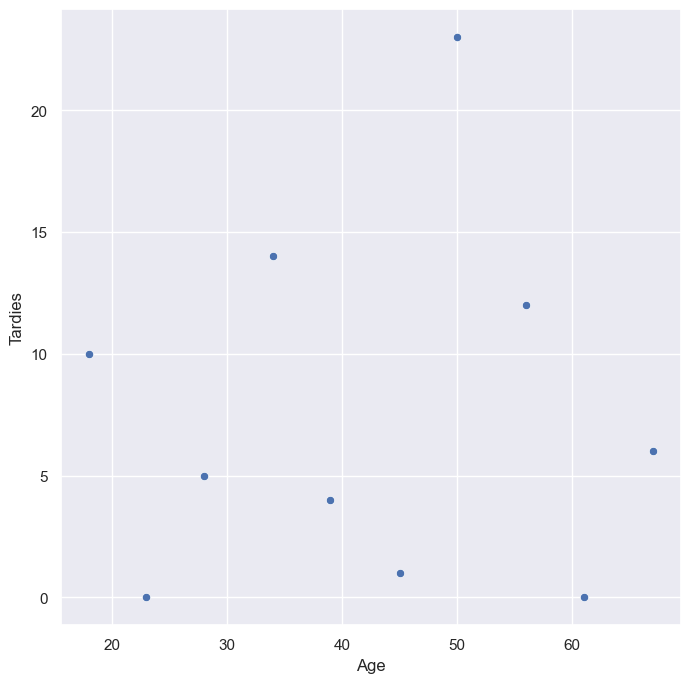

In [139]:
# Your code here.
sns.scatterplot(x = student_data_test.X_test , y =student_data_test.y_test)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

**Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?** 

¿Ves alguna tendencia? ¿Puedes formular alguna hipótesis sobre la relación entre la edad y el número de llegadas tarde?

    **We can see a trend between Age and tardies, Tardies is inversely proportional to the Age.**

    Podemos observar una tendencia entre la Edad y las llegadas tarde; las llegadas tarde son inversamente proporcionales a la Edad.


**Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.**

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

**Covarianza:**

La covarianza es una medida estadística que indica cómo dos variables aleatorias cambian juntas. Puede tomar valores positivos, negativos o cercanos a cero.

- **Covarianza Positiva:** Cuando es positiva, indica una relación positiva entre las variables.
- **Covarianza Negativa:** Cuando es negativa, indica una relación negativa entre las variables.
- **Covarianza Cercana a Cero:** Indica una relación débil o nula entre las variables.

La fórmula de covarianza es:

$$
\text{cov}(X, Y) = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{n-1}
$$


**Observaciones específicas sobre este caso no pueden hacerse sin conocer los valores exactos de covarianza, pero estos valores proporcionan información sobre la relación entre Edad y llegadas tarde.**


In [27]:
# Your response here.
student_data.corr()

,X_train,y_train
X_train,1.000000,-0.939163
y_train,-0.939163,1.000000


La matriz de covarianza es una matriz cuadrada que proporciona información sobre las covarianzas entre pares de variables en un conjunto de datos multivariado. Supongamos que tienes dos variables, X e Y, y calculas la matriz de covarianza con `np.cov(student_data.X, student_data.Y)`. La matriz resultante será de la forma:

$$
\begin{bmatrix}
\text{cov}(X, X) & \text{cov}(X, Y) \\
\text{cov}(Y, X) & \text{cov}(Y, Y)
\end{bmatrix}
$$

Aquí hay una descripción de los elementos de la matriz:

- **cov(X, X):** La covarianza de X consigo misma. Esto proporciona información sobre la dispersión de la variable X.

- **cov(X, Y):** La covarianza entre X e Y. Indica la dirección de la relación lineal entre X e Y. Si es positiva, sugiere una relación positiva; si es negativa, sugiere una relación negativa.

- **cov(Y, X):** Es lo mismo que cov(X, Y) ya que la covarianza es simétrica.

- **cov(Y, Y):** La covarianza de Y consigo misma. Al igual que cov(X, X), proporciona información sobre la dispersión de la variable Y.

La diagonal principal (cov(X, X) y cov(Y, Y)) proporciona la varianza de las variables individuales, y los elementos fuera de la diagonal principal (cov(X, Y) y cov(Y, X)) proporcionan información sobre la covarianza entre las variables.

Es importante mencionar que la covarianza por sí sola no es suficiente para evaluar la fuerza de la relación entre dos variables, ya que depende de las unidades de medida. Para obtener una medida más estandarizada de la relación, a menudo se utiliza la correlación, que se calcula dividiendo la covarianza entre los productos de las desviaciones estándar de las variables.

In [28]:
np.cov(student_data.X_train, student_data.y_train)[0][1]

-45.56666666666667

**Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.**

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Añade tus respuestas como comentarios después de tu código.

La línea de código `x=sm.add_constant(student_data.X)` está utilizando la función `add_constant` del módulo `sm` de `statsmodels` para agregar una columna de unos (constantes) a la variable `X` de tus datos. Esta acción es común en regresión lineal para incluir el término de intersección (o constante) en el modelo.

Cuando se realiza una regresión lineal simple, es decir, cuando tienes una sola variable predictora (`X`), agregar una constante al modelo significa que estás ajustando una recta que no pasa necesariamente por el origen. El modelo tiene la forma:

$$
Y = \beta_0 + \beta_1 \cdot X + \epsilon
$$

Donde:
- \( Y \) es la variable de respuesta.
- \( X \) es la variable predictora.
- $ \beta_0 $ es la constante (término de intersección).
- $ \beta_1 $ es el coeficiente asociado a \( X \).
- $ \epsilon $ es el término de error.

La función `add_constant` se utiliza para incluir explícitamente la constante $ \beta_0 $ en la matriz de variables predictoras.

Ahora, si tienes más de una columna en \( X \), es decir, si tienes múltiples variables predictoras (características), `add_constant` se encargará de agregar una columna de unos a la izquierda de tus variables predictoras. Esto es esencial para incluir el término de intersección en el modelo cuando hay múltiples variables predictoras. El modelo se extiende a:

$$
Y = \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2 + \ldots + \beta_n \cdot X_n + \epsilon
$$

Donde $ X_1, X_2, \ldots, X_n $ son las diferentes variables predictoras, y $ \beta_0, \beta_1, \ldots, \beta_n $ son los coeficientes asociados.

En resumen, `add_constant` asegura que el término de intersección sea incluido correctamente en el modelo de regresión lineal, independientemente de si tienes una o varias variables predictoras.

### **NORMALIZANDO DATOS**

In [100]:
X_train = np.array(student_data.X_train.tolist())
y_train = np.array(student_data.y_train.tolist())
X_test = np.array(student_data_test.X_test.tolist())
y_test = np.array(student_data_test.y_test.tolist())

In [102]:
# Normalizacion de X
scaler_x = MinMaxScaler()
scaler_x.fit(X_train.reshape(-1,1))
X_train = scaler_x.transform(X_train.reshape(-1,1))
X_test = scaler_x.transform(X_test.reshape(-1,1))


# Normalizacion de y
scaler_y = MinMaxScaler()
scaler_y.fit(y_test.reshape(-1,1)) # .reshape(-1, 1) se utiliza para transformar un vector a una matriz
y_train = scaler_y.transform(y_train.reshape(-1,1))
y_test = scaler_y.transform(y_test.reshape(-1,1))

### **ENTRENAMIENTO Y PREDICCIONES**

In [140]:
# Your response here.
X_train=sm.add_constant(X_train)

modelo=sm.OLS(y_train, X_train).fit()

X_test = sm.add_constant(X_test)

pred = modelo.predict(X_test)

#  proporciona información detallada sobre los resultados del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           5.57e-05
Time:                        00:23:44   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

In [141]:
for y, i in zip(y_test, pred):
    print(f"{y}, {i}")

10, 8.51802948664811
0, 7.303925632068208
5, 6.0898217774883046
14, 4.63289715199242
4, 3.418793297412517
1, 1.9618686719166334
23, 0.74776481733673
12, -0.7091598081591552
0, -1.9232636627390587
6, -3.380188288234944


La función `summary()` en `statsmodels` proporciona una descripción detallada de los resultados de un modelo ajustado. Esta función devuelve un objeto `Summary` que contiene información clave sobre el modelo. Aquí hay una descripción general de la información que puedes obtener de `summary()`:

1. **Resumen de Estadísticas Generales:**
   - **Modelo:** Tipo de modelo ajustado (p. ej., OLS para Mínimos Cuadrados Ordinarios).
   - **Fecha y Hora:** Cuándo se ajustó el modelo.
   - **Número de Observaciones:** Cantidad total de observaciones en el conjunto de datos.
   - **Grados de Libertad Residuales:** Representa la cantidad de grados de libertad en el error del modelo.

2. **Estadísticas de Ajuste:**
   - **R-cuadrado:** Mide la proporción de la variabilidad en la variable de respuesta explicada por el modelo.
   - **R-cuadrado ajustado:** Ajusta el R-cuadrado para tener en cuenta el número de predictores en el modelo.
   - **Estadístico F:** Prueba estadística para evaluar la significancia global del modelo.

3. **Coeficientes:**
   - **Intercepto:** Valor estimado para la constante (término de intersección).
   - **Coeficientes para Variables Predictoras:** Valores estimados para los coeficientes de las variables predictoras.
   - **Errores Estándar:** Desviaciones estándar de los coeficientes estimados.
   - **Valores t:** Relación entre el coeficiente estimado y su error estándar.
   - **P-values:** Probabilidad de observar un valor t igual o más extremo bajo la hipótesis nula de que el coeficiente es igual a cero.

4. **Diagnósticos de Residuos:**
   - **Estadísticos Durbin-Watson:** Prueba para detectar la presencia de autocorrelación en los residuos.
   - **Jarque-Bera:** Prueba para evaluar la normalidad de los residuos.
   - **Omnibus:** Proporciona información adicional sobre la normalidad de los residuos.

5. **Información Adicional:**
   - **AIC (Criterio de Información de Akaike):** Criterio de información que penaliza modelos con demasiados parámetros.
   - **BIC (Criterio de Información Bayesiano):** Similar al AIC pero con una penalización más fuerte para modelos con más parámetros.

6. **Tabla de Coeficientes:**
   - **Intercepto y Coeficientes de Variables Predictoras:** Tabla que resume los coeficientes, errores estándar, estadísticos t y valores p para cada variable del modelo.

En resumen proporciona una visión integral del rendimiento del modelo, la significancia de los coeficientes, la calidad del ajuste y diagnósticos de residuos para evaluar la validez de las suposiciones subyacentes del modelo. Es una herramienta esencial para interpretar y evaluar la eficacia de un modelo ajustado.

**modelo.params** es una propiedad específica del objeto resultante de ajustar un modelo en statsmodels. Proporciona los coeficientes estimados del modelo ajustado. Cuando ajustas un modelo usando sm.OLS(y, x).fit(), modelo.params contendrá los valores estimados para los coeficientes del modelo.

In [143]:
modelo.params

array([12.88880336, -0.24282077])

In [69]:
# Es decir, como estamos usando un modelo de regresion simple, podemos:
print(f"Los valores de predicción se obtienen con la recta:\n y_hat = {modelo.params[0]} + ({modelo.params[1]})X")

Los valores de predicción se obtienen con la recta:
 y_hat = 12.888803363135764 + (-0.2428207709159807)X


**Plot your regression model on your scatter plot.**

Grafica tu modelo de regresión en tu diagrama de dispersión.

In [144]:
def plot_regression_model(x,y):
    
    x_const = sm.add_constant(x) # add a constant to the model
    
    modelo = sm.OLS(y, x_const).fit() # fit the model
    
    pred = modelo.predict(x_const) # make predictions
    
    print(modelo.summary())
    
    const = modelo.params[0] # create a variable with the value of the constant given by the summary
    coef = modelo.params[1] # create a variable with the value of the coef given by the summary
    
    x_l=np.linspace(x.min(), x.max(), 50) 
    y_l= coef*x_l + const # function of the line

    plt.figure(figsize=(10, 10))

    # plot the line
    plt.plot(x_l, y_l, label=f'{x.name} vs {y.name}={coef}*{x.name}+{const}')

    # data
    plt.scatter(x, y, marker='x', c='g', label=f'{x.name} vs {y.name}')

    plt.title('Regresion lineal')
    plt.xlabel(f'{x.name}')
    plt.ylabel(f'{y.name}')
    plt.legend()
    return plt.show();

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           5.57e-05
Time:                        00:24:34   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

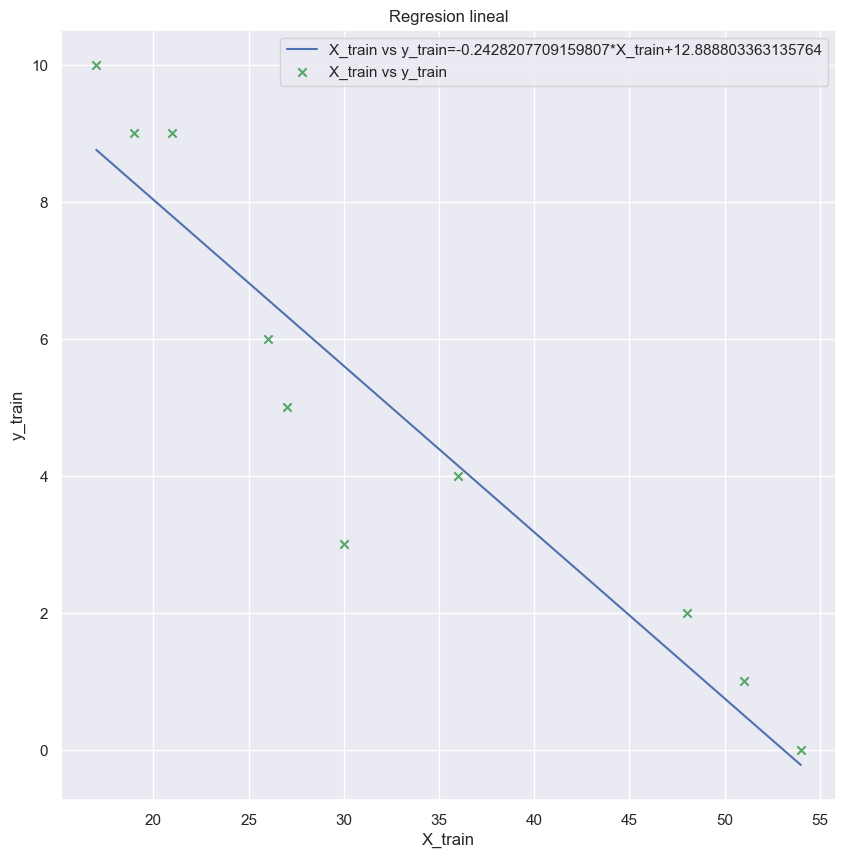

In [145]:
plot_regression_model(student_data.X_train, student_data.y_train)

### Esta función quiere usar train y test, pero el modelo tiene un 0.88 de r2 y sin embargo las predicciones son una mierda...............

In [158]:
def plot_regression_model_ana(X_train, y_train, X_test, y_test):
    
    # Añadir una constante a los datos de entrenamiento y prueba
    x_const_train = sm.add_constant(X_train)
    x_const_test = sm.add_constant(X_test)
    
    # Ajustar el modelo utilizando datos de entrenamiento
    modelo = sm.OLS(y_train, x_const_train).fit()
    
    # Hacer predicciones utilizando datos de prueba
    pred = modelo.predict(x_const_test)

    # Imprimir resumen del modelo
    print(modelo.summary())
    
    # Obtener los coeficientes del modelo
    const = modelo.params[0]
    coef = modelo.params[1]
    
    # Imprimir información sobre la recta de regresión
    print("------------------------------------------------------------------------------------")
    print(f"Los valores de predicción se obtienen con la recta:\n y_hat = {const} + ({coef})X")

    x_l=np.linspace((x_const_train.min() + 20), (x_const_train.max() + 20), 50) 
    y_l= coef*x_l + const
    
    # Crear una figura para el gráfico
    plt.figure(figsize=(10, 10))

    # Graficar la recta de regresión
    plt.plot(X_test, pred, label=f'Regresión: y = {const} + {coef}*X', color='red')

    # Valores predichos
    plt.scatter(X_test, pred, marker='+', c='black', label='Valores predichos')

    # Graficar los puntos de prueba y los valores reales de y_test
    plt.scatter(X_test, y_test, marker='x', c='green', label='Valores reales')

    # plot the line
    plt.plot(x_l, y_l, label=f'X vs Y={coef}*X+{const}', color = "blue")
    
    # Etiquetas y título del gráfico
    plt.title('Regresión lineal')
    plt.xlabel('Variable X')
    plt.ylabel('Variable Y')
    
    # Mostrar leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.show()

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           5.57e-05
Time:                        00:33:19   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

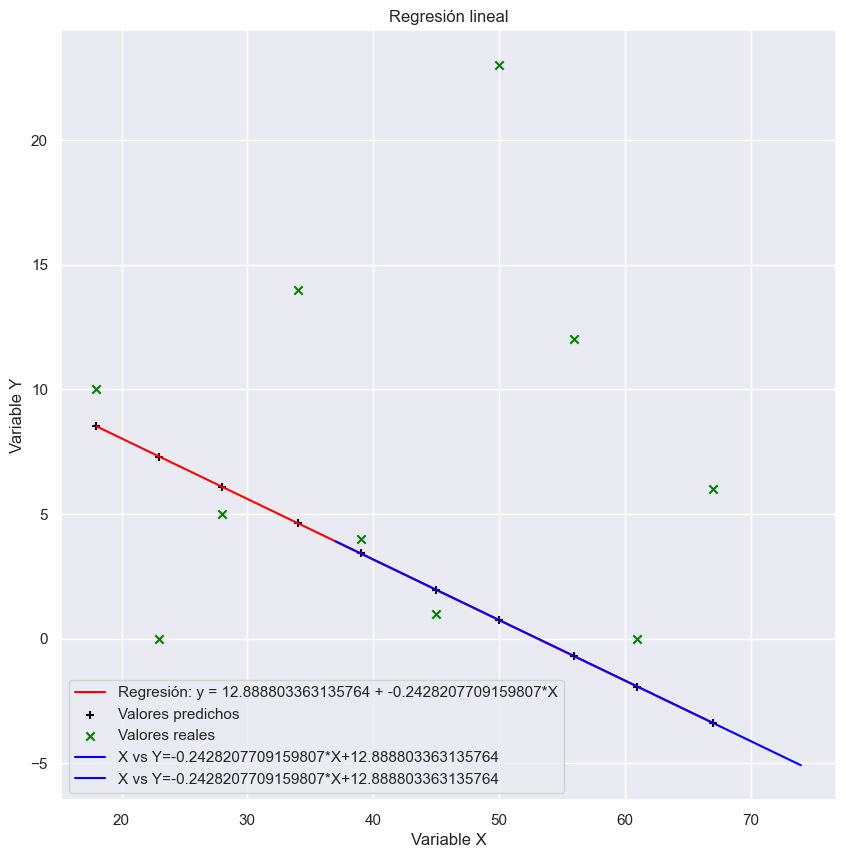

In [159]:
plot_regression_model_ana(student_data.X_train, student_data.y_train, student_data_test.X_test, student_data_test.y_test)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

    Based on this results we can say that the Age is a good predictor for tardiness, at more age the probability of tardiness is lower.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [14]:
# Import any libraries you may need & the data
df = pd.read_csv('../Data/vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

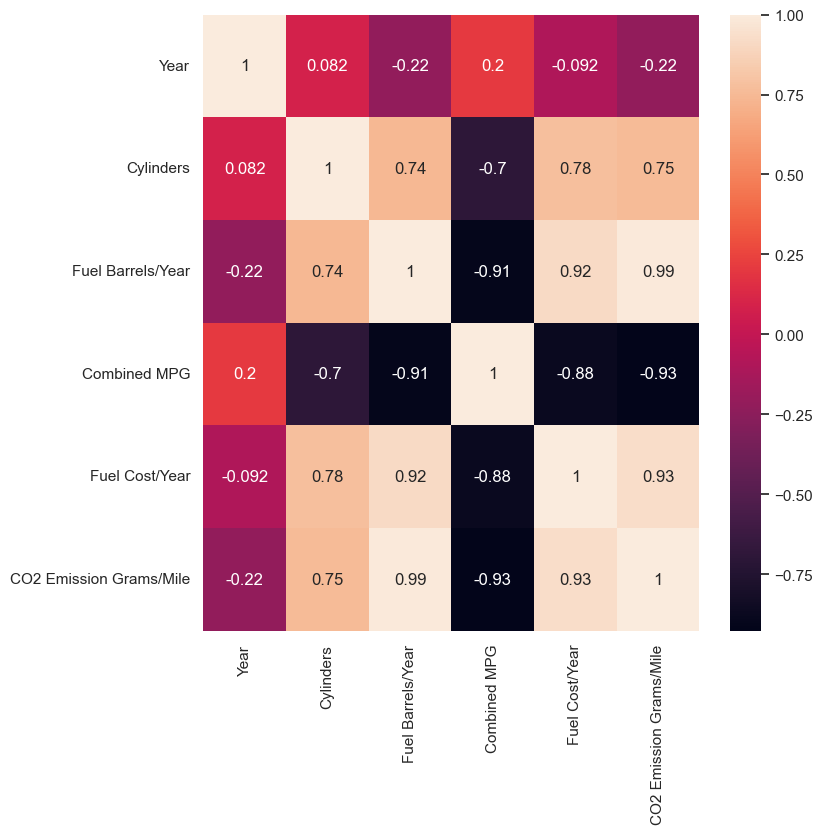

In [15]:
# Your response here. 
cars = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

sns.heatmap(cars.corr(), annot=True)
plt.show();

    The most important variable to predict the CO2 emissions is Fuel Barrels/Year, and the variable that is lower helpful is the Year

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [16]:
# Your response here. 
x = cars.drop('CO2 Emission Grams/Mile', axis = 1)

y = cars['CO2 Emission Grams/Mile']

modelo=sm.OLS(y, x).fit()

pred = modelo.predict(x)

    *We decide an OLS because with it can make a summary an interpret the result with it.*

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [17]:
# Your response here. 
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Fri, 24 Nov 2023   Prob (F-statistic):                        0.00
Time:                             18:59:27   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

    Based on the results all the feactures have a pvalue = 0, so all of it have important significance on the model.
    

In [18]:
modelo.params

Year                  0.062994
Cylinders             0.887349
Fuel Barrels/Year    19.858822
Combined MPG         -3.050862
Fuel Cost/Year        0.029197
dtype: float64

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.049
Model:                                 OLS   Adj. R-squared:                  0.049
Method:                      Least Squares   F-statistic:                     1869.
Date:                     Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                             18:59:35   Log-Likelihood:            -2.2194e+05
No. Observations:                    35952   AIC:                         4.439e+05
Df Residuals:                        35950   BIC:                         4.439e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

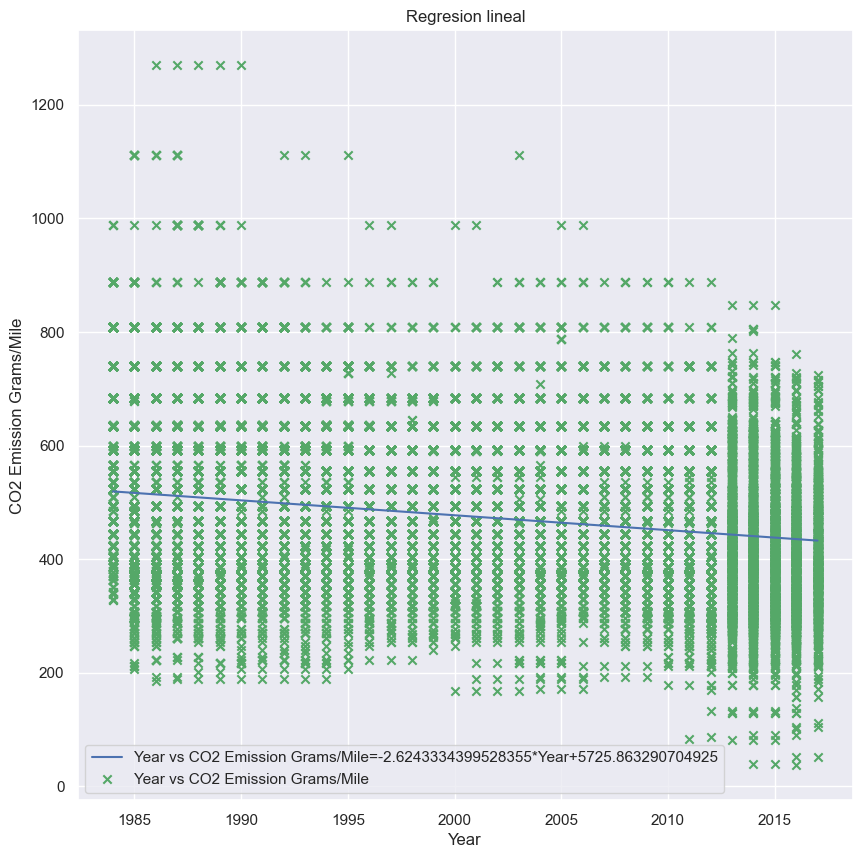

In [19]:
plot_regression_model(x.Year, y)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.566
Model:                                 OLS   Adj. R-squared:                  0.566
Method:                      Least Squares   F-statistic:                 4.690e+04
Date:                     Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                             18:59:41   Log-Likelihood:            -2.0784e+05
No. Observations:                    35952   AIC:                         4.157e+05
Df Residuals:                        35950   BIC:                         4.157e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

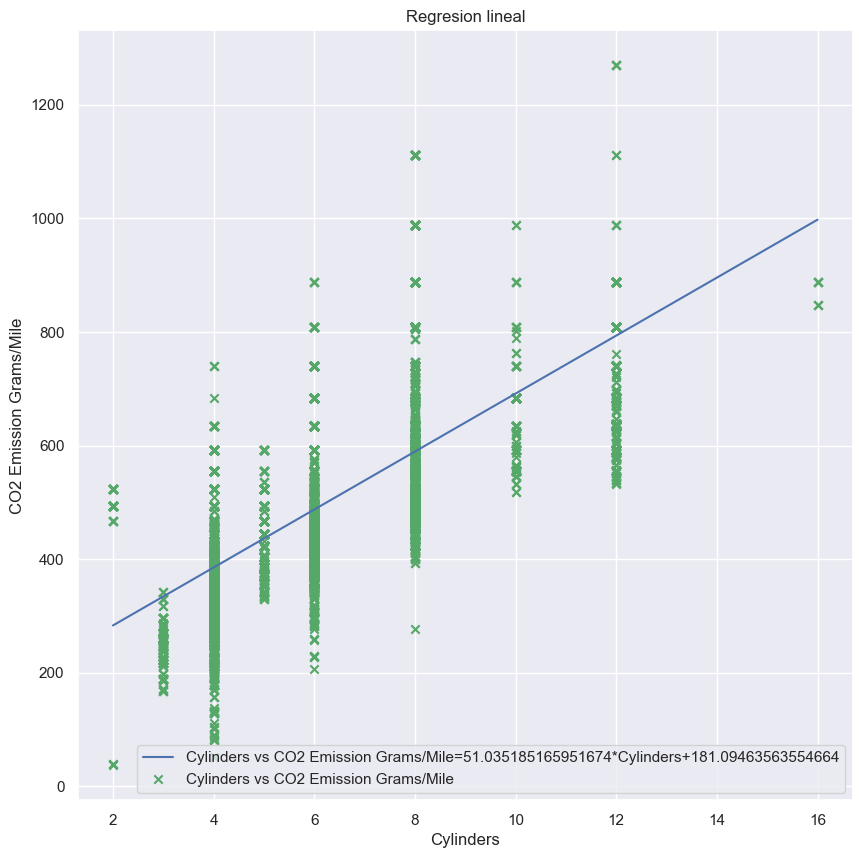

In [20]:
plot_regression_model(x.Cylinders, y)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.973
Model:                                 OLS   Adj. R-squared:                  0.973
Method:                      Least Squares   F-statistic:                 1.275e+06
Date:                     Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                             18:59:51   Log-Likelihood:            -1.5821e+05
No. Observations:                    35952   AIC:                         3.164e+05
Df Residuals:                        35950   BIC:                         3.164e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

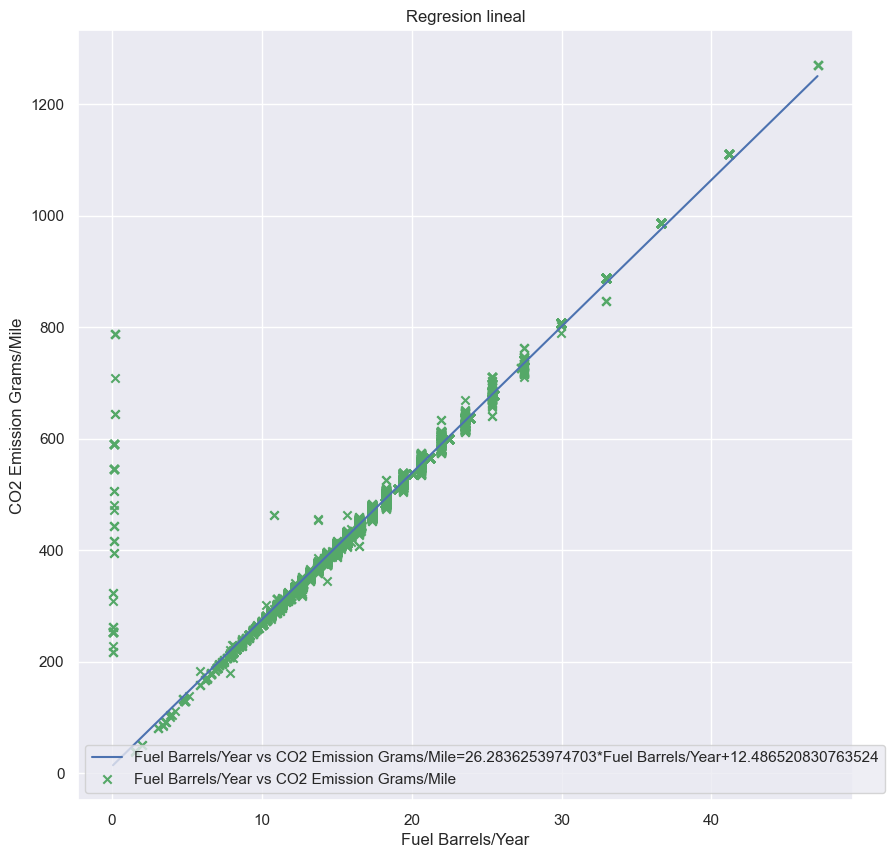

In [21]:
plot_regression_model(x['Fuel Barrels/Year'], y)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.858
Model:                                 OLS   Adj. R-squared:                  0.858
Method:                      Least Squares   F-statistic:                 2.170e+05
Date:                     Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                             19:00:01   Log-Likelihood:            -1.8778e+05
No. Observations:                    35952   AIC:                         3.756e+05
Df Residuals:                        35950   BIC:                         3.756e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

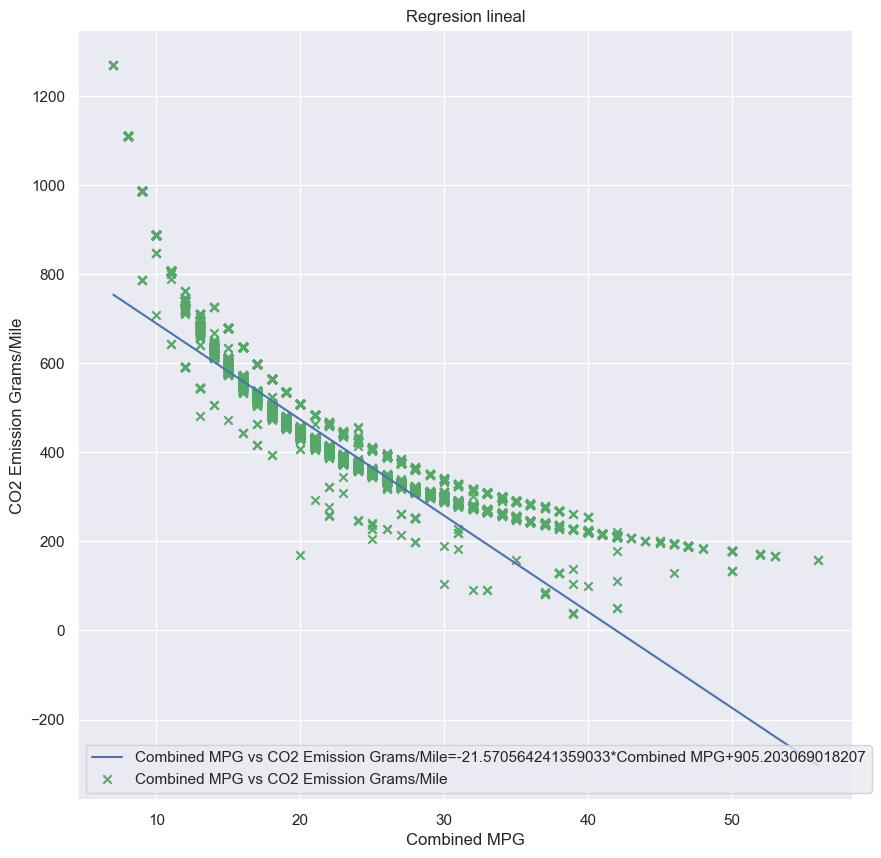

In [22]:
plot_regression_model(x['Combined MPG'], y)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.867
Model:                                 OLS   Adj. R-squared:                  0.867
Method:                      Least Squares   F-statistic:                 2.334e+05
Date:                     Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                             19:00:10   Log-Likelihood:            -1.8665e+05
No. Observations:                    35952   AIC:                         3.733e+05
Df Residuals:                        35950   BIC:                         3.733e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

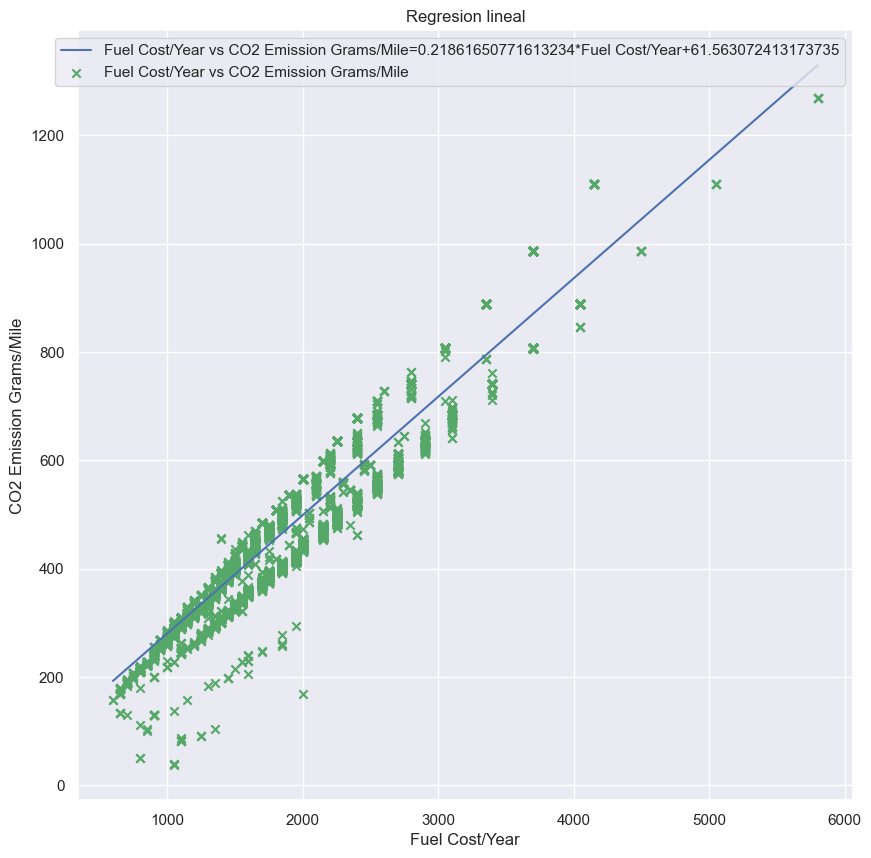

In [23]:
plot_regression_model(x['Fuel Cost/Year'], y)

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [24]:
x_values = [1,3,4,6,8,9,11,14]
y_values = [1,2,4,4,5,7,8,13]

parties = pd.DataFrame({'X': x_values, 'Y': y_values})

parties

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           0.000102
Time:                        19:00:20   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

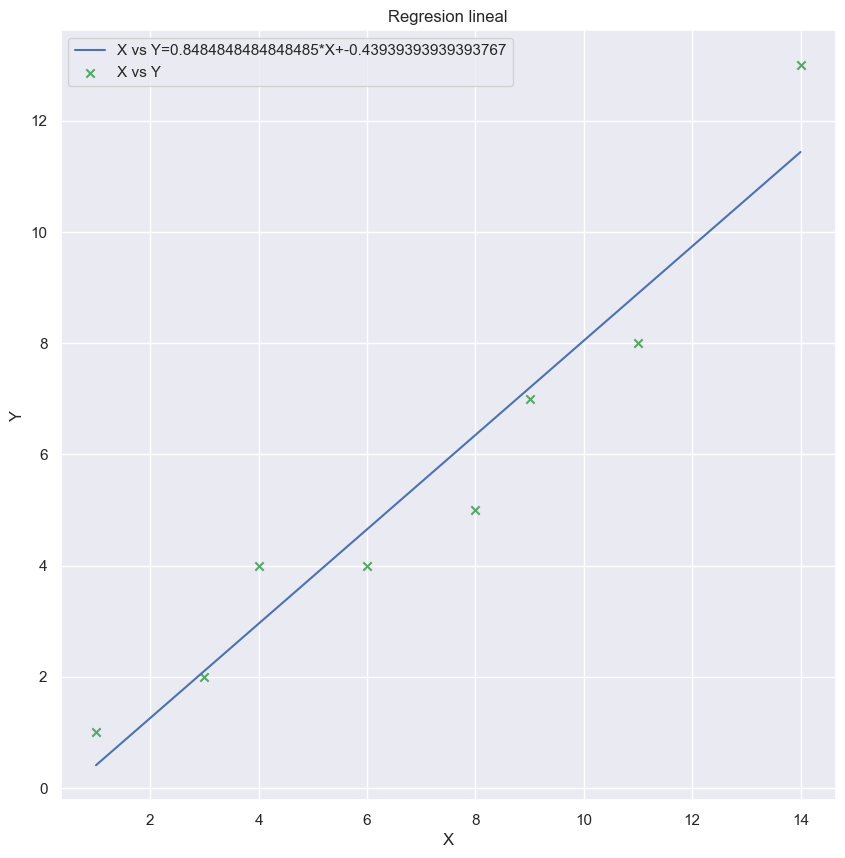

In [25]:
plot_regression_model(parties.X, parties.Y)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [26]:
# Your response here. 
stats = parties.describe().T
stats['IQR']=stats['75%']-stats['25%']

stats

,count,mean,std,min,25%,50%,75%,max,IQR
X,8.0,7.0,4.342481,1.0,3.75,7.0,9.50,14.0,5.75
Y,8.0,5.5,3.817254,1.0,3.50,4.5,7.25,13.0,3.75


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [29]:
def get_outliers(df: pd.DataFrame, stats: pd.DataFrame, threshold: float = 1.5) -> pd.DataFrame:
    
    """
    Esta funcion recibe un dataframe df.describe().T.
    
    Devuelve un dataframe.
    
    :param: stats, pd.DataFrame
    :param: threshold, umbral del test de tukey
    
    :return: pd.DataFrame
    """
    
    outliers=pd.DataFrame(columns=stats.index)

    for c in stats.index:

        iqr=stats.at[c, 'IQR']

        cutoff=threshold * iqr  # test tukey

        lower=stats.at[c, '25%'] - cutoff
        upper=stats.at[c, '75%'] + cutoff

        res=df[(df[c] < lower) | (df[c] > upper)].copy()

        res['outliers']=c
        outliers= pd.concat([outliers, res], sort=True, ignore_index=True)
        
    return outliers

In [30]:
outliers = get_outliers(parties, stats)

In [31]:
clean_index=[i for i in parties.index if i not in outliers.index]

In [32]:
clean_index

[1, 2, 3, 4, 5, 6, 7]

In [33]:
parties = parties.iloc[clean_index]
parties

,X,Y
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     56.70
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           0.000654
Time:                        19:06:45   Log-Likelihood:                -9.6134
No. Observations:                   7   AIC:                             23.23
Df Residuals:                       5   BIC:                             23.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8742      1.025     -0.853      0.4

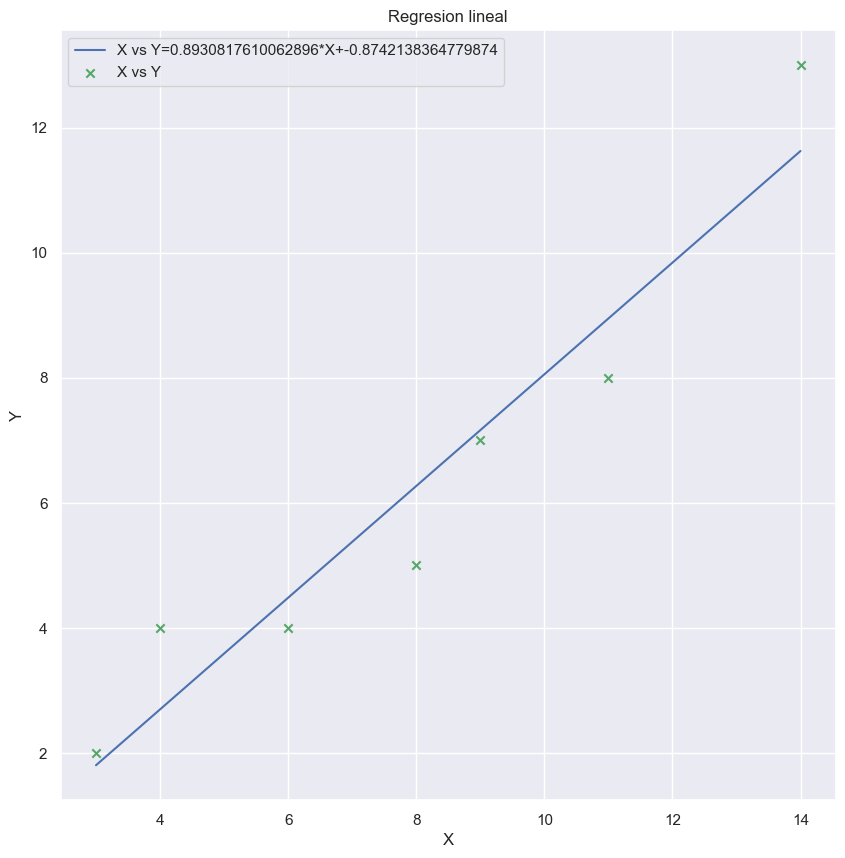

In [34]:
plot_regression_model(parties.X, parties.Y)